In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [63]:
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

print("Feature matrix shape:", X.shape)
print("Target shape:", y.shape)
y.value_counts()

Feature matrix shape: (569, 30)
Target shape: (569,)


target
1    357
0    212
Name: count, dtype: int64

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y # for imbalance data
)

print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

Training samples: 426
Test samples: 143


In [65]:
# rule of thumbs :: small dataset: 100; medium: 100-300; large: 300-500

rf_baseline = RandomForestClassifier(
    n_estimators = 10, # total number of tree
    random_state=42
)

rf_baseline.fit(X_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [66]:
y_pred = rf_baseline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred, target_names=data.target_names))

Accuracy: 0.951048951048951
              precision    recall  f1-score   support

   malignant       0.93      0.94      0.93        53
      benign       0.97      0.96      0.96        90

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



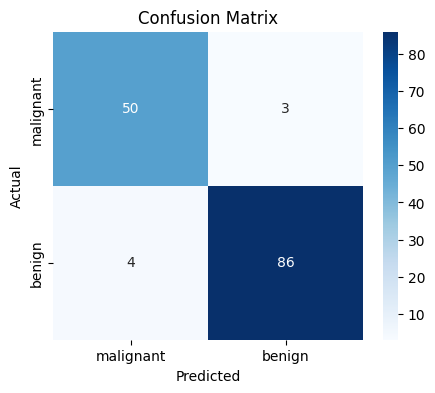

In [67]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# malignant : cancer; benign : non cancer

In [68]:
# feature importance
importances = pd.Series(
    rf_baseline.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.head(10)

worst concave points    0.219597
mean concave points     0.098235
mean perimeter          0.090414
worst area              0.090201
worst radius            0.085263
mean radius             0.076653
area error              0.059317
radius error            0.051290
worst compactness       0.044146
worst texture           0.030739
dtype: float64

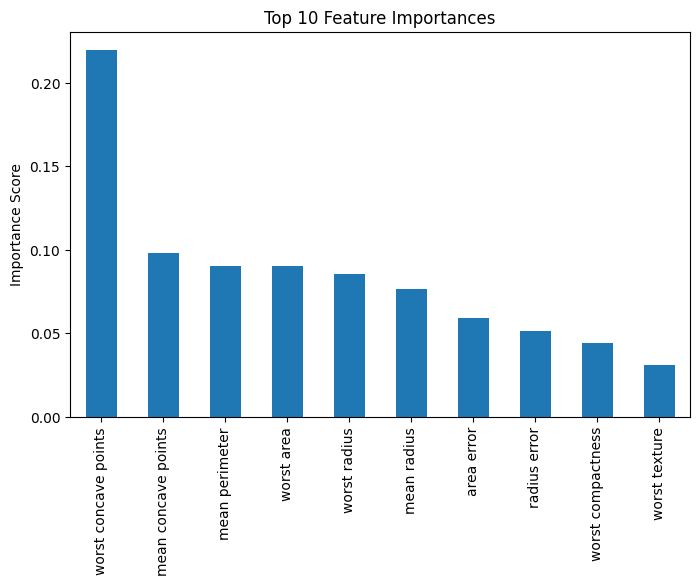

In [69]:
plt.figure(figsize=(8,5))
importances.head(10).plot(kind="bar")
plt.title("Top 10 Feature Importances")
plt.ylabel("Importance Score")
plt.show()

In [70]:
# key hyperparameters
param_grid={
    "n_estimators": [100,150,175,200], # total number of trees
    "max_depth": [None, 5, 10, 15],    # max depth of each tree (for tree dont overfit)
    "min_samples_split": [2,3,5],      # minimum number of samples needed to split a node
    "max_features": ["sqrt", "log2"]   # number of features considered at each split
}

In [71]:
# GridSearchCV for Tuning
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5, # cross validation (dataset split into 5 parts: 4 for training 1 for test)
    scoring="f1", # how to measure
    n_jobs=-1 # Uses all CPU cores (n_jobs = -1) to run faster, n = 1 for 1 core, 2 for 2 cores
)

grid_rf.fit(X_train, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 5, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_split': [2, 3, ...], 'n_estimators': [100, 150, ...]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [72]:
#Showing outputs
print("Best parameters found:")
print(grid_rf.best_params_)

Best parameters found:
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 3, 'n_estimators': 100}


In [73]:
# evaluating the Tuned Model
best_rf = grid_rf.best_estimator_
y_pred_best = best_rf.predict(X_test)

print("Previous accuracy for 10:", accuracy_score(y_test, y_pred),'\n')
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best, target_names=data.target_names))

Previous accuracy for 10: 0.951048951048951 

Accuracy: 0.958041958041958
              precision    recall  f1-score   support

   malignant       0.96      0.92      0.94        53
      benign       0.96      0.98      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



### Regression

In [74]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data_reg = fetch_california_housing()

X_reg = pd.DataFrame(data_reg.data, columns=data_reg.feature_names)
y_reg = pd.Series(data_reg.target, name="target")

print(X_reg.shape)
print(y_reg.shape)
y_reg.value_counts()

(20640, 8)
(20640,)


target
5.00001    965
1.37500    122
1.62500    117
1.12500    103
1.87500     93
          ... 
3.59200      1
0.54900      1
3.77600      1
0.81200      1
0.47000      1
Name: count, Length: 3842, dtype: int64

In [75]:
print(X_reg.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [76]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg,
    test_size=0.25,
    random_state=42,
)
print("Training samples:", X_train_reg.shape[0])
print("Test samples:", X_test_reg.shape[0])

Training samples: 15480
Test samples: 5160


In [77]:
rf_reg = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)
rf_reg.fit(X_train_reg, y_train_reg)

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [78]:
y_pred_reg = rf_reg.predict(X_test_reg)

mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 0.3271442355749357
MSE: 0.2519873227299513
RMSE: 0.5019833888984289
R2: 0.8095647861873104


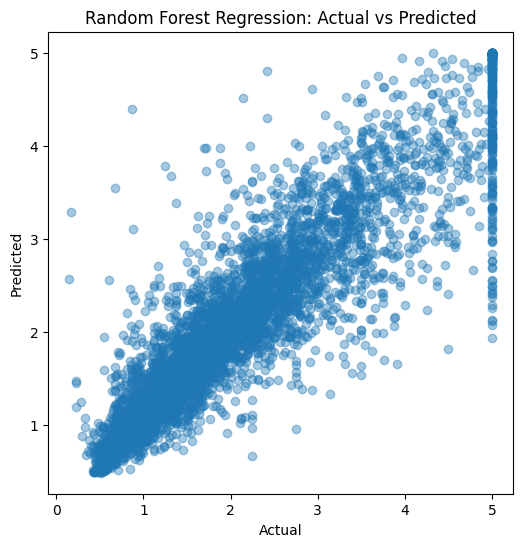

In [79]:
plt.figure(figsize=(6,6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random Forest Regression: Actual vs Predicted")
plt.show()

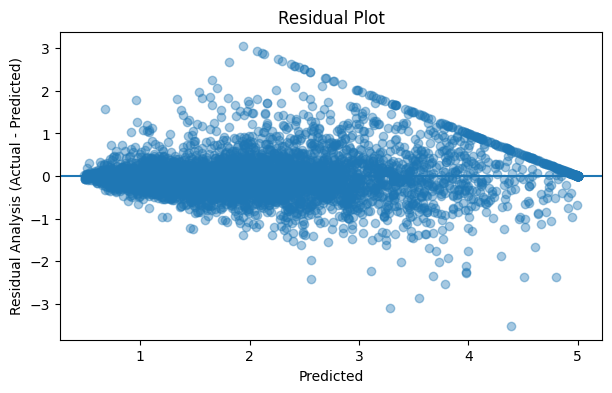

In [80]:
# A good model should have residuals centered around 0 with no obvious pattern.

residuals = y_test_reg - y_pred_reg
plt.figure(figsize=(7,4))
plt.scatter(y_pred_reg, residuals, alpha=0.4)
plt.axhline(0)
plt.xlabel("Predicted")
plt.ylabel("Residual Analysis (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()